<a href="https://colab.research.google.com/github/a1iceee/Deep_Learning_School_1semestr/blob/master/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Deep Learning (семестр 1, весна 2020): продвинутый поток**
************
##*Homework № 1: Sklearn, kNN*

In [1]:
import pandas as pd
import numpy as np

all_data = pd.read_csv('/forest_dataset.csv',)
all_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


Выделим значения метки класса в переменную `predict`, признаковые описания в переменную `matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-- формат с помощью метода `.values`.

In [2]:
predict = all_data[all_data.columns[-1]].values
matrix = all_data[all_data.columns[:-1]].values

In [3]:
from sklearn.model_selection import train_test_split 
#делим выборку на обучающую и тестовую

train_matrix, test_matrix, train_predict, test_predict = train_test_split(
    matrix, predict, test_size=0.2, random_state=42) 
#test_size контролирует, какая часть выборки будет тестовой

### Вопрос 1:
* Какое качество у вас получилось?

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=10)
# обучение модели
model.fit(train_matrix, train_predict)
# предсказание на тестовой выборке
y_pred = model.predict(test_matrix)

accuracy_score(test_predict, y_pred)

0.716

### Вопрос 2:
* Какую metric следует использовать?

### Вопрос 3:
* Сколько n_neighbors следует использовать?

### Вопрос 4:
* Какой тип weights следует использовать?

In [5]:
from sklearn.model_selection import GridSearchCV
#перебор гиперпараметров по сетке

param_grid = {
    'n_neighbors': np.arange(1, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean']
}

model_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# запустим поиск
model_grid.fit(matrix, predict)

# выведем наилучшие параметры
print(model_grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки.

In [7]:

optimal_clf = KNeighborsClassifier(n_neighbors=4, metric='manhattan', weights='distance')
#обучение модели
optimal_clf.fit(train_matrix, train_predict)
#вероятности принадлежности к классам для тестовой выборки
pred_prob = optimal_clf.predict_proba(test_matrix)
pred_prob

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73117861, 0.26882139, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27814042, 0.72185958, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54264548, 0.        , 0.        , ..., 0.        , 0.        ,
        0.45735452]])

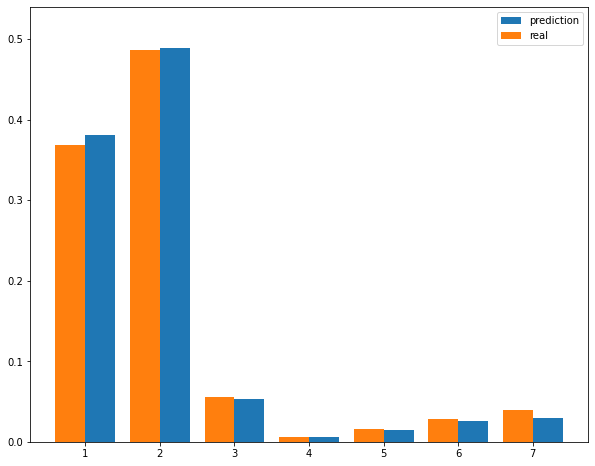

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_predict, return_counts=True)
freq = list(map(lambda x: x / len(test_predict),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

### Вопрос 5:
* Какая прогнозируемая вероятность pred_freq класса под номером 3(до 2 знаков после запятой)?

In [9]:
pred_freq[2]#в задании классы нумеруются с единицы, а в массивах индексация с нуля.

0.05292089118013177